In [15]:
import pandas as pd
import pandas_datareader as web
import datetime
import matplotlib.pyplot as plt
import time
plt.style.use(['ggplot'])

In [2]:
start = datetime.datetime(2014, 11, 14)
end = datetime.datetime(2019, 11, 13)
botanix = web.DataReader("BOT.AX", 'yahoo', start, end)

In [3]:
start = datetime.datetime(2014, 11, 14)
end = datetime.datetime(2019, 11, 13)
ACREAGE = web.DataReader("ACRGF", 'yahoo', start, end)

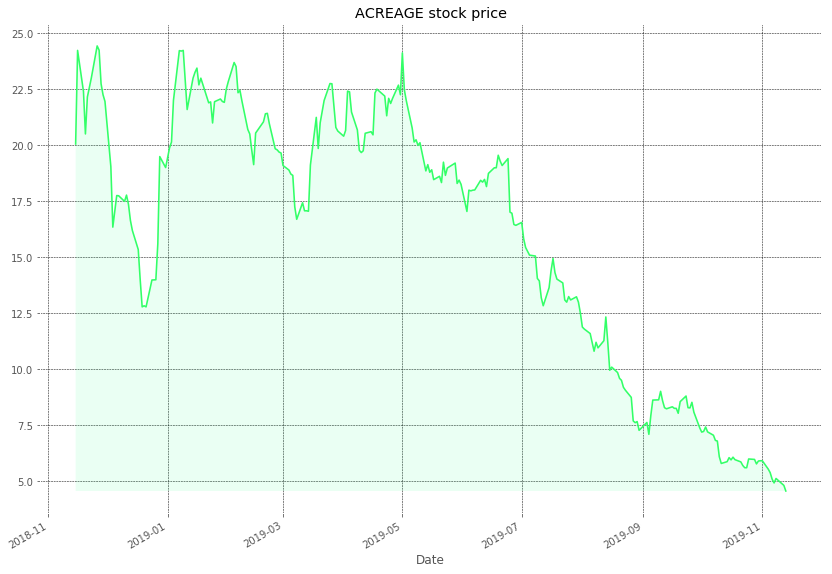

In [4]:
%matplotlib inline
def plot_stock(stock_close,title_name):
    ax = stock_close.plot(figsize = (14,10), color = '#33ff68',title = title_name,grid = False,linewidth = 1.6)
    ax.set_facecolor('white')
    ax.grid(color='black', linestyle='--', linewidth=.5)
    minprice = stock_close.min()
    ax.fill_between(stock_close.index, minprice,stock_close, facecolor='#33ff93', alpha=0.1)
    
def plot_returns(stock_close,title_name):
    stock_close['returns'] = (stock_close['Close'] / stock_close['Close'].shift(1) ) - 1
    plot_stock(stock_close['returns'],title_name)
    return stock_close

plot_stock(ACREAGE['Close'],'ACREAGE stock price')


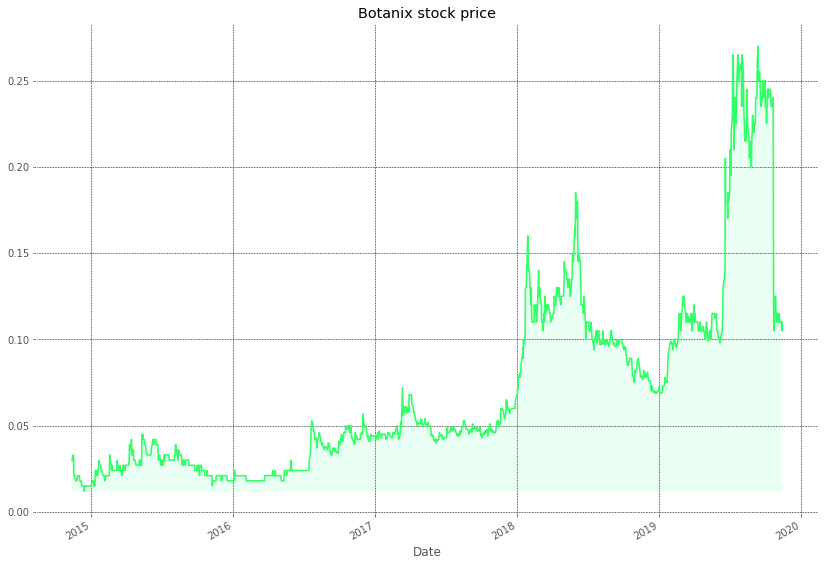

In [5]:
plot_stock(botanix['Close'],'Botanix stock price')


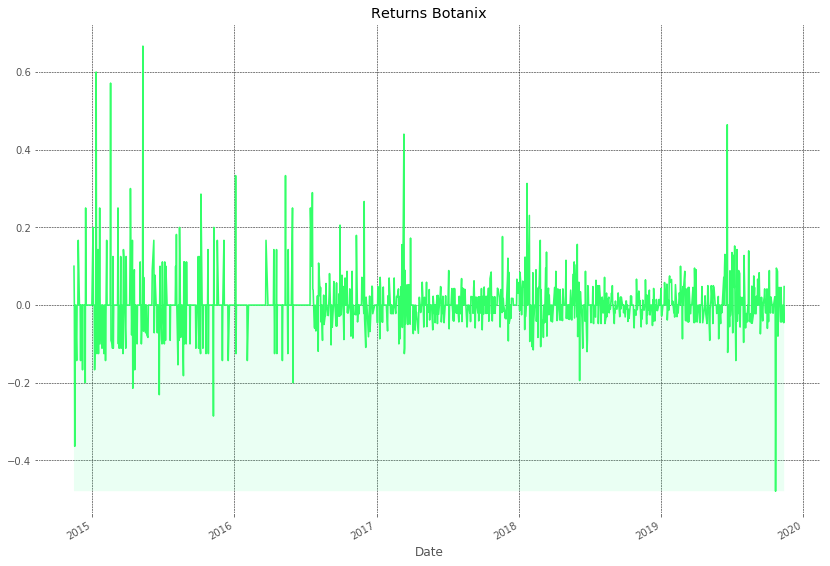

In [6]:
botanix = plot_returns(stock_close =botanix,title_name ='Returns Botanix')

In [7]:
start = datetime.datetime(2014, 11, 14)
end = datetime.datetime(2019, 11, 13)
alcanna = web.DataReader("CLIQ.TO", 'yahoo', start, end)


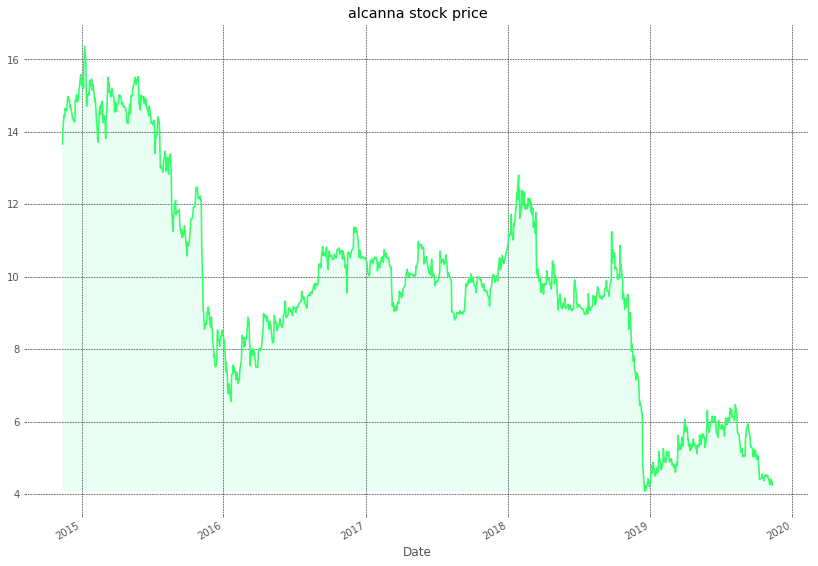

In [110]:
plot_stock(alcanna['Close'],'alcanna stock price')

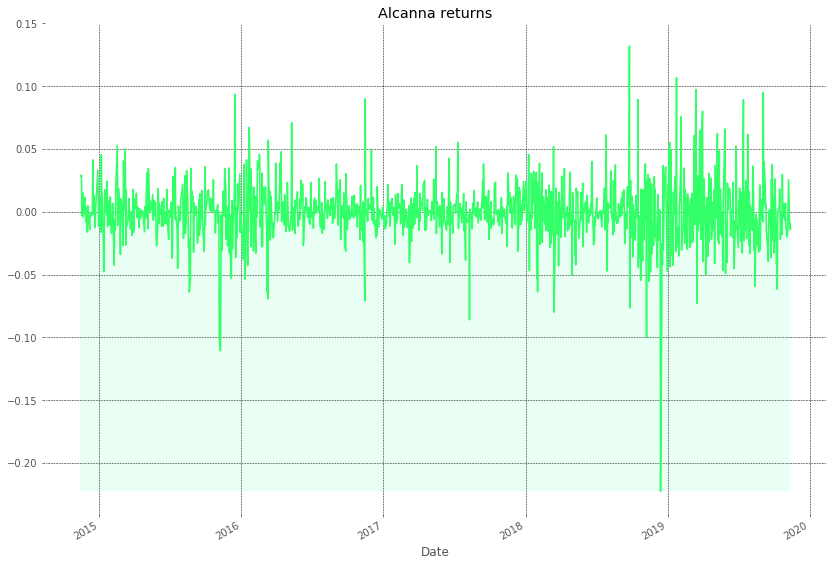

In [111]:
alcanna = plot_returns(stock_close =alcanna,title_name ='Alcanna returns')

In [26]:
''''And we can continue getting the returns and stock data information from the yahoo finance api
If we want to know the growth of investment in the cannabis industry a 
more useful approach would be to form a cannabi index
this way we can keep track a market capitalization based on the stock volume and stock prices.
'''

#To do this I will import 22 stocks from the recommended stock pick from yahoo finance to form the index. and model the
#growth of investment.

#https://finance.yahoo.com/u/yahoo-finance/watchlists/420_stocks/


tickers_to_get = open('tickers.csv','r')
tickers = []
for i in tickers_to_get:
    tickers.append(i.partition("\t")[0])
print(tickers)
len(tickers)

['BUD', 'ABBV', 'MO', 'TAP', 'WEED.TO', 'SMG', 'CGC', 'GWPH', 'ACB', 'CRON', 'TLRY', 'HYG.TO', 'CRBP', 'TGOD.TO', 'NBEV', 'TRST.TO', 'TGODF', 'CTST', 'TRTC', 'CANN', 'MJ']


21

In [16]:
#Looping and getting the data in the last 2 years
start = datetime.datetime(2017,11, 16)
end = datetime.datetime(2019,11, 16)
index = []
for ticker in tickers:
    try:
        df = web.DataReader(ticker, 'yahoo', start, end)
        index.append(df)
    except Exception as e:
        print('Bad ticker!: {}'.format(ticker),e)
    time.sleep(5) #do not upset the api


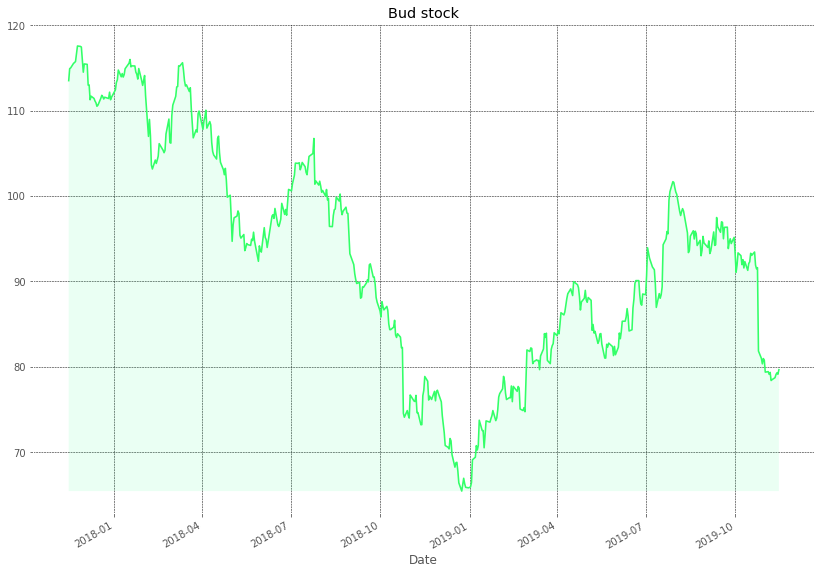

In [19]:
#Amazing we got all the day from all stocks now lets construct the index by market cap

plot_stock(index[0]['Close'],'Bud stock')

In [25]:
index[0].head(10)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-11-15,114.099998,113.449997,113.699997,113.500000,2739200.0,108.084724
2017-11-16,115.910004,114.790001,115.779999,114.910004,2016800.0,109.427452
2017-11-17,115.190002,114.580002,114.930000,114.989998,1591900.0,109.503639
2017-11-20,115.610001,114.709999,114.779999,115.529999,1393300.0,110.017876
2017-11-21,115.739998,115.050003,115.279999,115.620003,1300100.0,110.103584
2017-11-22,116.699997,115.190002,116.650002,115.750000,727500.0,110.227379
2017-11-24,117.620003,117.010002,117.290001,117.559998,731300.0,111.951012
2017-11-27,117.860001,117.099998,117.739998,117.510002,2067600.0,111.903404
2017-11-28,118.250000,117.139999,118.239998,117.440002,1175900.0,111.836746


In [23]:
#So Volume * share price = Market cap in US dollars

cannabis_market = pd.DataFrame()
len(index)


21

In [28]:
i = 0
for stock in index:
    try:
        cannabis_market[tickers[i] + ' Cap'] = stock['Volume']*stock['Close']
        i += 1
    except Exception as e:
        print('Wrong key this {} stock does not have that information error: '.format(tickers[i]),e)
        i += 1
        continue
cannabis_market.head(10)

Wrong key this HYG.TO stock does not have that information error:  cannot reindex from a duplicate axis


,BUD Cap,ABBV Cap,MO Cap,TAP Cap,WEED.TO Cap,SMG Cap,CGC Cap,GWPH Cap,ACB Cap,CRON Cap,TLRY Cap,CRBP Cap,TGOD.TO Cap,NBEV Cap,TRST.TO Cap,TGODF Cap,CTST Cap,TRTC Cap,CANN Cap,MJ Cap
Date,,,,,,,,,,,,,,,,,,,,
2017-11-15,3.108992e+08,4.449568e+08,2.984144e+08,1.131030e+08,1.597178e+08,3.780785e+07,2.563198e+07,6.946457e+07,2.312095e+07,NaN,NaN,5.581620e+06,NaN,3.882990e+05,7.192800e+06,NaN,NaN,1.191900e+06,159421.081114,92729.602051
2017-11-16,2.317505e+08,4.063722e+08,3.429515e+08,9.594443e+07,1.551501e+08,3.805746e+07,3.107572e+07,6.154918e+07,2.964750e+07,NaN,NaN,5.489130e+06,NaN,1.431612e+06,4.008543e+06,NaN,NaN,7.452000e+05,163583.995056,379647.003937
2017-11-17,1.830526e+08,3.170009e+08,4.600780e+08,5.966438e+07,1.604135e+08,4.140005e+07,2.368933e+07,4.117216e+07,1.516787e+07,NaN,NaN,4.229400e+06,NaN,5.263440e+05,3.021465e+06,NaN,NaN,9.903750e+05,403448.005199,148804.998398
2017-11-20,1.609679e+08,4.073659e+08,3.356474e+08,9.381240e+07,1.107648e+08,2.169847e+07,1.407036e+07,4.760659e+07,1.137332e+07,NaN,NaN,2.753800e+06,NaN,1.145848e+06,2.360790e+06,NaN,NaN,7.500000e+05,191759.995461,248640.003204
2017-11-21,1.503176e+08,4.114982e+08,3.227617e+08,6.922256e+07,5.654697e+07,3.511990e+07,9.348742e+06,1.827521e+08,8.861655e+06,NaN,NaN,3.693200e+06,NaN,2.628920e+05,1.479470e+06,NaN,NaN,5.553000e+05,213136.990690,156562.004852
2017-11-22,8.420812e+07,2.419093e+08,3.561150e+08,1.171783e+08,8.493102e+07,3.470866e+07,1.514346e+07,3.534849e+07,1.353791e+07,NaN,NaN,4.967870e+06,NaN,5.231600e+05,2.169750e+06,NaN,NaN,1.636740e+06,226291.997671,147744.998932
2017-11-24,8.597163e+07,1.830843e+08,1.359103e+08,2.342298e+07,4.735819e+07,1.496859e+07,7.508498e+06,1.888931e+07,1.886648e+07,NaN,NaN,1.695400e+06,NaN,1.856250e+05,2.099862e+06,NaN,NaN,1.147410e+06,280430.009222,136767.201614
2017-11-27,2.429637e+08,2.905157e+08,3.158953e+08,7.553007e+07,1.217767e+08,2.293656e+07,1.821766e+07,2.889366e+07,4.539175e+07,NaN,NaN,5.074355e+06,NaN,7.810560e+05,3.828500e+06,NaN,NaN,1.614375e+06,802367.974949,306218.995285
2017-11-28,1.380977e+08,4.871573e+08,6.431703e+08,1.101613e+08,1.275938e+08,2.255260e+07,1.758670e+07,4.393319e+07,3.851906e+07,NaN,NaN,6.360210e+06,NaN,4.872186e+05,3.505375e+06,NaN,NaN,1.157400e+06,876925.000000,443112.007904


In [30]:
cannabis_market.sum()  #Sum of the cannabis industry by market cap

BUD Cap        7.949846e+10
ABBV Cap       3.187974e+11
MO Cap         2.515281e+11
TAP Cap        5.997959e+10
WEED.TO Cap    8.939967e+10
SMG Cap        2.377188e+10
CGC Cap        1.131707e+11
GWPH Cap       3.424691e+10
ACB Cap        4.323578e+10
CRON Cap       5.154695e+10
TLRY Cap       9.150924e+10
CRBP Cap       3.130647e+09
TGOD.TO Cap    4.610712e+09
NBEV Cap       1.579967e+10
TRST.TO Cap    5.768652e+09
TGODF Cap      1.104564e+09
CTST Cap       2.832130e+09
TRTC Cap       8.755062e+08
CANN Cap       8.282284e+08
MJ Cap         1.082447e+10
dtype: float64

In [31]:
cannabis_market.max() #Where company TRST.TO Cap    had the highest market cap during the last 2 years

BUD Cap        7.238743e+08
ABBV Cap       5.921659e+09
MO Cap         2.627482e+09
TAP Cap        7.539614e+08
WEED.TO Cap    1.370954e+09
SMG Cap        4.521121e+08
CGC Cap        1.993945e+09
GWPH Cap       4.955694e+08
ACB Cap        1.208552e+09
CRON Cap       1.643382e+09
TLRY Cap       6.789491e+09
CRBP Cap       1.467284e+08
TGOD.TO Cap    1.308828e+08
NBEV Cap       1.019869e+09
TRST.TO Cap    9.364408e+07
TGODF Cap      7.393491e+07
CTST Cap       1.700841e+08
TRTC Cap       3.540321e+07
CANN Cap       4.491255e+07
MJ Cap         2.367516e+08
dtype: float64

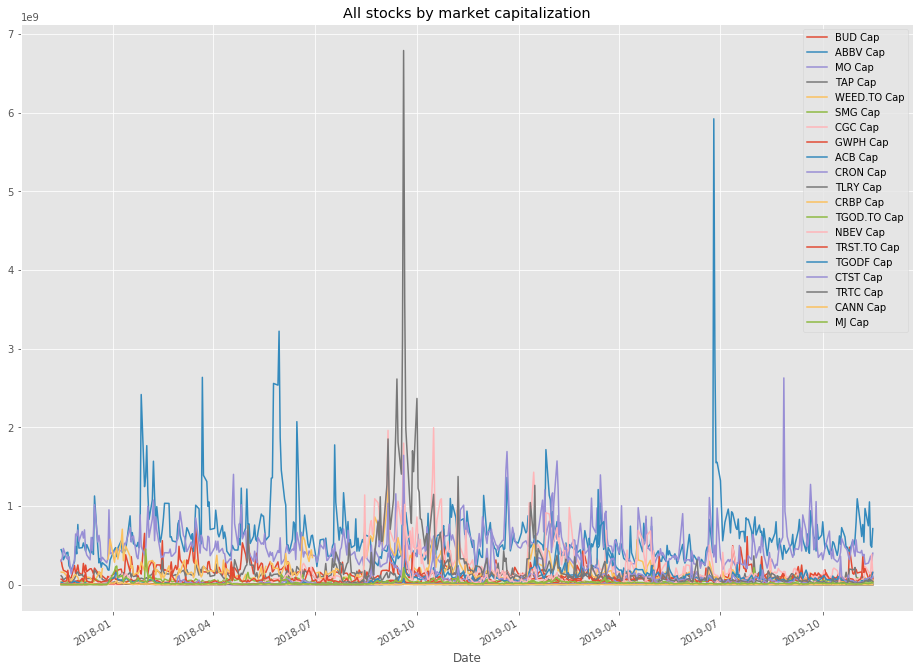

In [118]:
#cannabis_market['BUD Cap'] = index[0]['Volume']*index[0]['Close']
cannabis_market.plot(figsize = (16,12) ,title = 'All stocks by market capitalization');  #market capitalization

In [43]:
for stock in cannabis_market:
    print(stock,type(stock))
    

BUD Cap <class 'str'>
ABBV Cap <class 'str'>
MO Cap <class 'str'>
TAP Cap <class 'str'>
WEED.TO Cap <class 'str'>
SMG Cap <class 'str'>
CGC Cap <class 'str'>
GWPH Cap <class 'str'>
ACB Cap <class 'str'>
CRON Cap <class 'str'>
TLRY Cap <class 'str'>
CRBP Cap <class 'str'>
TGOD.TO Cap <class 'str'>
NBEV Cap <class 'str'>
TRST.TO Cap <class 'str'>
TGODF Cap <class 'str'>
CTST Cap <class 'str'>
TRTC Cap <class 'str'>
CANN Cap <class 'str'>
MJ Cap <class 'str'>


In [50]:
#all_stocks_market_cap = pd.DataFrame()
market = cannabis_market['BUD Cap']
for stock in cannabis_market[1::]:
    market += cannabis_market[stock] 


In [53]:
market.tail(10)

Date
2019-11-04    1.906625e+09
2019-11-05    1.845456e+09
2019-11-06    1.998290e+09
2019-11-07    1.662631e+09
2019-11-08    2.241472e+09
2019-11-11    1.710901e+09
2019-11-12    2.176548e+09
2019-11-13    1.746487e+09
2019-11-14    2.057134e+09
2019-11-15    1.948361e+09
Name: BUD Cap, dtype: float64

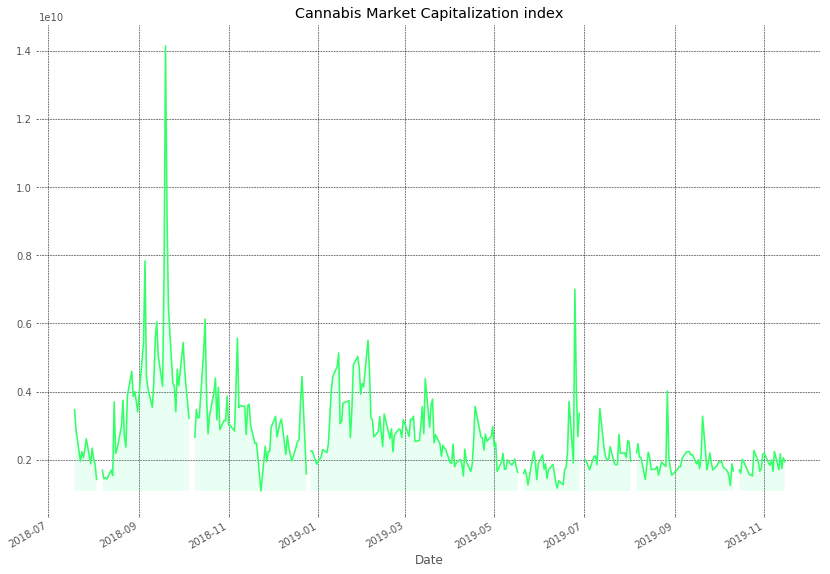

In [55]:
plot_stock(market, 'Cannabis Market Capitalization index')

In [56]:
#Total market capitalization in US dollars
market.sum()

900026633260.0352

In [67]:
#Fill in the gaps from the total market cap with the average
market = pd.DataFrame(market)
market.apply(lambda row: row.fillna(row.mean() ))
market.tail(10)

,BUD Cap
Date,
2019-11-04,1.906625e+09
2019-11-05,1.845456e+09
2019-11-06,1.998290e+09
2019-11-07,1.662631e+09
2019-11-08,2.241472e+09
2019-11-11,1.710901e+09
2019-11-12,2.176548e+09
2019-11-13,1.746487e+09
2019-11-14,2.057134e+09


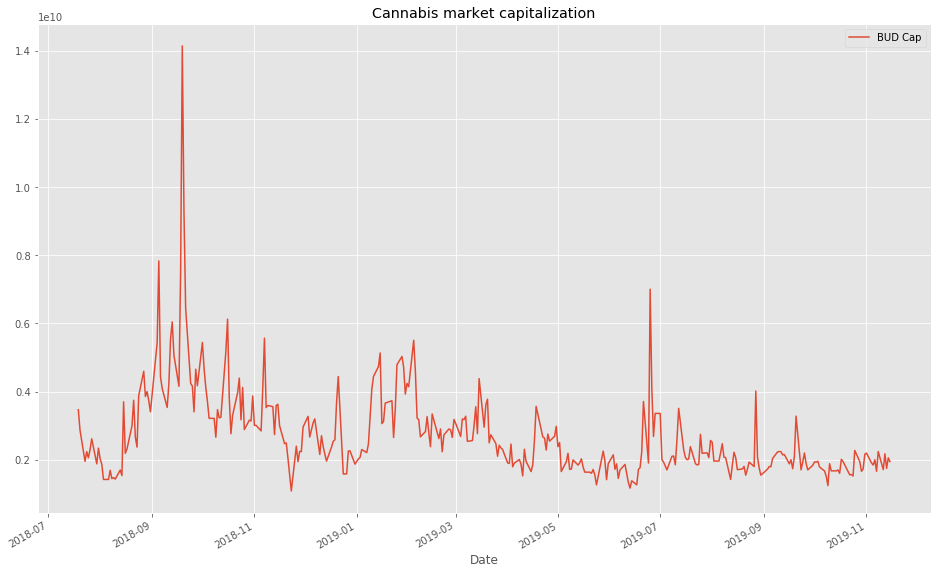

In [84]:
market =market.fillna(method='ffill')
market.plot(figsize = (16,10), title = 'Cannabis market capitalization')

In [93]:
# From above we can see the cannabis market had a strong exponential growth during 2018 but is been declining
market.columns
market = market.rename(columns={'BUD Cap':'market_cap'})
market.tail(10)

,market_cap
Date,
2019-11-04,1.906625e+09
2019-11-05,1.845456e+09
2019-11-06,1.998290e+09
2019-11-07,1.662631e+09
2019-11-08,2.241472e+09
2019-11-11,1.710901e+09
2019-11-12,2.176548e+09
2019-11-13,1.746487e+09
2019-11-14,2.057134e+09


In [101]:
#lets now construct the returns of the market 
def plot_market_returns(market,title_name):
    market['returns'] = (market['market_cap'] / market['market_cap'].shift(1) ) - 1
    plot_stock(market['returns'],title_name)
    return market

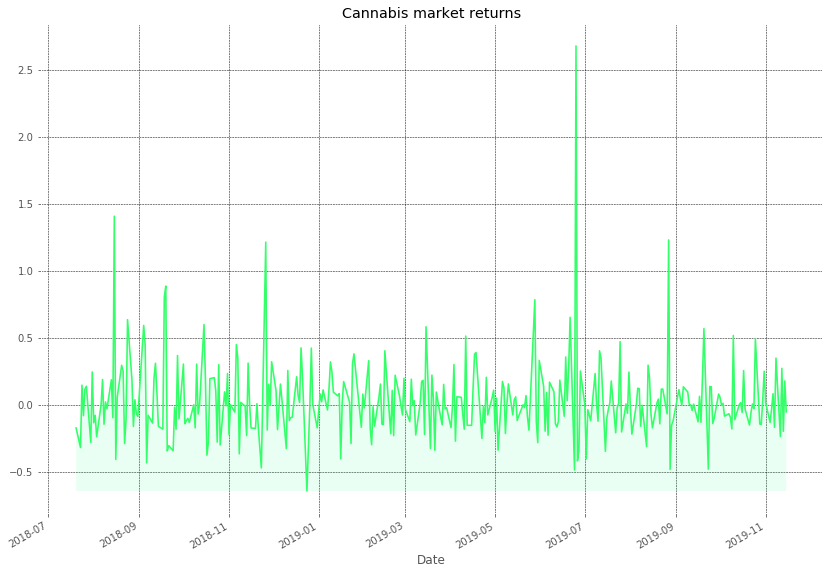

In [104]:
market = plot_market_returns(market,'Cannabis market returns')

In [ ]:
#Amazing! The cannabis index has had outstanding returns during the last days espcially during July we can see a
#a significant increase


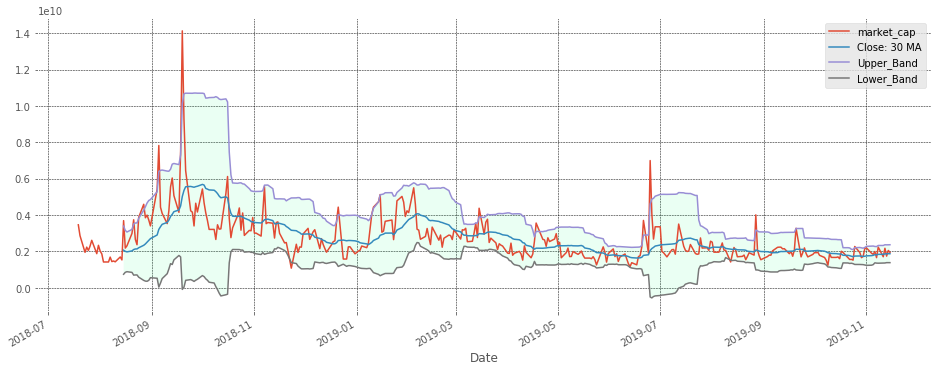

In [116]:
#Creating confidence intervals for the new index
market['Close: 30 MA'] = market['market_cap'].rolling(window=20).mean() #Moving average
market['Upper_Band'] = market['Close: 30 MA'] + 2*market['market_cap'].rolling(window=20).std()
market['Lower_Band'] = market['Close: 30 MA'] - 2*market['market_cap'].rolling(window=20).std()
ax = market[['market_cap','Close: 30 MA','Upper_Band','Lower_Band']].plot(figsize=(16,6))
ax.set_facecolor('white')
ax.grid(color='black', linestyle='--', linewidth=.5)
ax.fill_between(market.index,market['Lower_Band'],market['market_cap'], facecolor='#33ff93', alpha=0.1)
ax.fill_between(market.index,market['Upper_Band'],market['market_cap'], facecolor='#33ff93', alpha=0.1)
